In [1]:
import pandas as pd
import numpy as np
import datetime

# Read Data

In [2]:
#df=pd.read_csv('data/calls.csv',index_col='DATE',parse_dates=True)
#df=df.dropna()

In [3]:
df_envios = pd.read_pickle('data/df_Envios')
df_envios.head(1)

,total,Bag 14,Bag 19,Burofax,Devolución burofax,Documentos 14,E-Commerce,E-commerce,E-commerce canje,Ecobox 25,...,Urgente 8:30,Urgente 8:30 expedición,Urgente funchal,Urgente hoy,NaN,Friday,Monday,Thursday,Tuesday,Wednesday
Fecha envío,,,,,,,,,,,,,,,,,,,,,
2019-01-01,33,0.0,0.0,0.0,0.0,0.0,0.0,16.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0


In [4]:
df_envios.tail(1)

,total,Bag 14,Bag 19,Burofax,Devolución burofax,Documentos 14,E-Commerce,E-commerce,E-commerce canje,Ecobox 25,...,Urgente 8:30,Urgente 8:30 expedición,Urgente funchal,Urgente hoy,NaN,Friday,Monday,Thursday,Tuesday,Wednesday
Fecha envío,,,,,,,,,,,,,,,,,,,,,
2021-12-04,2991,0.0,0.0,6.0,0.0,0.0,0.0,790.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0,0,0,0,0


In [5]:
df_envios = df_envios[['total']]
df_envios.head()

,total
Fecha envío,
2019-01-01,33
2019-01-02,1923
2019-01-03,1408
2019-01-04,3220
2019-01-05,23


In [6]:
df_envios['t1'] = df_envios.shift(periods=1)
df_envios['t2'] = df_envios['total'].shift(periods=2)
df_envios['t3'] = df_envios['total'].shift(periods=3)
df_envios['t4'] = df_envios['total'].shift(periods=4)
df_envios['t5'] = df_envios['total'].shift(periods=5)
df_envios.head()

,total,t1,t2,t3,t4,t5
Fecha envío,,,,,,
2019-01-01,33,NaN,NaN,NaN,NaN,NaN
2019-01-02,1923,33.0,NaN,NaN,NaN,NaN
2019-01-03,1408,1923.0,33.0,NaN,NaN,NaN
2019-01-04,3220,1408.0,1923.0,33.0,NaN,NaN
2019-01-05,23,3220.0,1408.0,1923.0,33.0,NaN


In [7]:
#df_envios.dropna(inplace=True)
df_envios.head()

,total,t1,t2,t3,t4,t5
Fecha envío,,,,,,
2019-01-01,33,NaN,NaN,NaN,NaN,NaN
2019-01-02,1923,33.0,NaN,NaN,NaN,NaN
2019-01-03,1408,1923.0,33.0,NaN,NaN,NaN
2019-01-04,3220,1408.0,1923.0,33.0,NaN,NaN
2019-01-05,23,3220.0,1408.0,1923.0,33.0,NaN


In [8]:
list = ['t5','t4','t3','t2','t1','total']
df_envios = df_envios[list]
df_envios['t'] = df_envios['total']
df_envios.drop('total', axis='columns', inplace=True)
df_envios.index = df_envios.index.rename('Date')
df_envios.head()

,t5,t4,t3,t2,t1,t
Date,,,,,,
2019-01-01,NaN,NaN,NaN,NaN,NaN,33
2019-01-02,NaN,NaN,NaN,NaN,33.0,1923
2019-01-03,NaN,NaN,NaN,33.0,1923.0,1408
2019-01-04,NaN,NaN,33.0,1923.0,1408.0,3220
2019-01-05,NaN,33.0,1923.0,1408.0,3220.0,23


In [9]:
df_calls = pd.read_pickle('data/df_Call')
print('Shape of data',df_calls.shape)
df_calls.head()

Shape of data (575, 1)


,dateCreacion
Date,
2019-01-02,281
2019-01-03,283
2019-01-04,351
2019-01-07,173
2019-01-08,174


In [10]:
df_calls.tail()

,dateCreacion
Date,
2021-04-15,116
2021-04-16,114
2021-04-19,114
2021-04-20,108
2021-04-21,53


In [11]:
df_calls.reset_index(inplace=True)
df_calls.head()

,Date,dateCreacion
0,2019-01-02,281
1,2019-01-03,283
2,2019-01-04,351
3,2019-01-07,173
4,2019-01-08,174


In [12]:
df_calls = df_calls.set_index('Date').join(df_envios, how='left')

In [13]:
df_calls.reset_index(inplace=True)
df_calls.head()

,Date,dateCreacion,t5,t4,t3,t2,t1,t
0,2019-01-02,281,NaN,NaN,NaN,NaN,33.0,1923.0
1,2019-01-03,283,NaN,NaN,NaN,33.0,1923.0,1408.0
2,2019-01-04,351,NaN,NaN,33.0,1923.0,1408.0,3220.0
3,2019-01-07,173,1923.0,1408.0,3220.0,23.0,248.0,4595.0
4,2019-01-08,174,1408.0,3220.0,23.0,248.0,4595.0,2924.0


In [14]:
begin_date = '2019-01-02'
end_date = '2021-04-20'

#df = pd.DataFrame({'date':pd.date_range(begin_date, periods=840)})
df = pd.DataFrame({'date':pd.date_range(begin_date,end_date)})

In [15]:
df['Date'] = [str(x.date()) for x in df['date']]

In [16]:
df = df.set_index('Date').join(df_calls.set_index('Date'))#[['dateCreacion']]
#df = df_calls

In [17]:
#df.fillna(0, inplace=True)

In [18]:
df.reset_index(inplace=True)

In [19]:
df = df.drop('date', axis='columns')
##########df = df.iloc[5:]
df.head(10)

,Date,dateCreacion,t5,t4,t3,t2,t1,t
0,2019-01-02,281.0,NaN,NaN,NaN,NaN,33.0,1923.0
1,2019-01-03,283.0,NaN,NaN,NaN,33.0,1923.0,1408.0
2,2019-01-04,351.0,NaN,NaN,33.0,1923.0,1408.0,3220.0
3,2019-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2019-01-07,173.0,1923.0,1408.0,3220.0,23.0,248.0,4595.0
6,2019-01-08,174.0,1408.0,3220.0,23.0,248.0,4595.0,2924.0
7,2019-01-09,227.0,3220.0,23.0,248.0,4595.0,2924.0,289.0
8,2019-01-10,236.0,23.0,248.0,4595.0,2924.0,289.0,2461.0
9,2019-01-11,270.0,248.0,4595.0,2924.0,289.0,2461.0,23.0


In [20]:
df.fillna(0, inplace=True)

In [21]:
list = ['Date','t5','t4','t3','t2','t1','t','dateCreacion']
df = df[list]
df.head(10)

,Date,t5,t4,t3,t2,t1,t,dateCreacion
0,2019-01-02,0.0,0.0,0.0,0.0,33.0,1923.0,281.0
1,2019-01-03,0.0,0.0,0.0,33.0,1923.0,1408.0,283.0
2,2019-01-04,0.0,0.0,33.0,1923.0,1408.0,3220.0,351.0
3,2019-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2019-01-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2019-01-07,1923.0,1408.0,3220.0,23.0,248.0,4595.0,173.0
6,2019-01-08,1408.0,3220.0,23.0,248.0,4595.0,2924.0,174.0
7,2019-01-09,3220.0,23.0,248.0,4595.0,2924.0,289.0,227.0
8,2019-01-10,23.0,248.0,4595.0,2924.0,289.0,2461.0,236.0
9,2019-01-11,248.0,4595.0,2924.0,289.0,2461.0,23.0,270.0


# Plot Your Data

<AxesSubplot:>

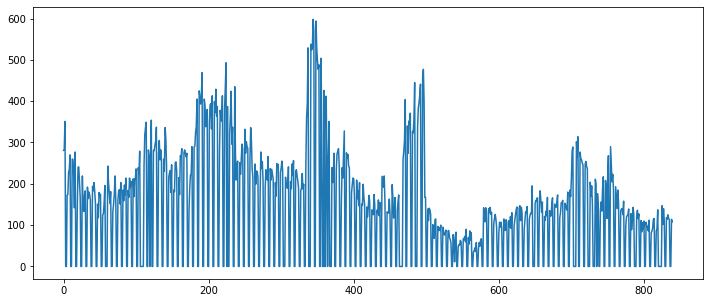

In [22]:
df['dateCreacion'].plot(figsize=(12,5))

# Check For Stationarity

In [23]:
from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF : ",dftest[0])
  print("2. P-Value : ", dftest[1])
  print("3. Num Of Lags : ", dftest[2])
  print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
  print("5. Critical Values :")
  for key, val in dftest[4].items():
      print("\t",key, ": ", val)

In [24]:
adf_test(df['dateCreacion'])

1. ADF :  -2.897851892995071
2. P-Value :  0.04559836392875885
3. Num Of Lags :  20
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 819
5. Critical Values :
	 1% :  -3.4383596631852327
	 5% :  -2.865075444948184
	 10% :  -2.568652576059133


# Figure Out Order for ARIMA Model

In [27]:
from pmdarima import auto_arima
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [28]:
stepwise_fit = auto_arima(df['dateCreacion'], trace=True,
                          suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=10125.692, Time=0.92 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=10616.241, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=10609.682, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=10407.916, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=10614.244, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=10231.938, Time=0.38 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=10202.408, Time=0.44 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=10199.248, Time=0.90 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=10149.512, Time=1.23 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=10317.526, Time=0.57 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=10182.808, Time=0.71 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=10202.946, Time=0.64 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=10096.676, Time=1.36 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.59 sec
 ARIMA(3,1,4)(0,0,0)[0] i

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  840
Model:               SARIMAX(5, 1, 5)   Log Likelihood               -4805.818
Date:                Mon, 07 Jun 2021   AIC                           9633.637
Time:                        17:33:43   BIC                           9685.691
Sample:                             0   HQIC                          9653.588
                                - 840                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7894      0.068     11.585      0.000       0.656       0.923
ar.L2         -1.4338      0.053    -27.198      0.000      -1.537      -1.330
ar.L3          0.7905      0.096      8.251      0.000       0.603       0.978
ar.L4         -0.9841      0.054    -18.322      0.000      -1.089      -0.879
ar.L5         -0.0044      0.064     -0.069      0.945      -0.130       0.121
ma.L1         -1.5081      0.059    -25.548      0.000      -1.624      -1.392
ma.L2          1.8423      0.068     27.125      0.000       1.709       1.975
ma.L3         -1.7353      0.074    -23.418      0.000      -1.881      -1.590
ma.L4          1.3893      0.063     21.932      0.000       1.265       1.514
ma.L5         -0.6293      0.047    -13.482      0.000      -0.721      -0.538
sigma2      7871.9880    363.529     21.654      0.000    7159.484    8584.492
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):              1344.34
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):               0.40   Skew:                            -0.71
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [29]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Split Data into Training and Testing

In [30]:
print(df.shape)

(840, 8)


In [31]:
i, m = df.shape

to_train = int(i*0.8)
to_test = i - to_train

print(to_train+to_test)

840


In [32]:
train = df.iloc[:to_train]
test = df.iloc[-to_test:]
print(train.shape,test.shape)
print(test.iloc[0]), print(test.iloc[-1])

(672, 8) (168, 8)
Date            2020-11-04
t5                  1806.0
t4                   239.0
t3                   614.0
t2                  2321.0
t1                  2312.0
t                    802.0
dateCreacion         122.0
Name: 672, dtype: object
Date            2021-04-20
t5                  2111.0
t4                  1868.0
t3                   226.0
t2                    82.0
t1                  2835.0
t                   2147.0
dateCreacion         108.0
Name: 839, dtype: object


(None, None)

## Train the Model

In [33]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [34]:
model=SARIMAX(train['dateCreacion'],order=(5,1,5), exog=train[['t5','t4','t3','t2','t1','t']])
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           dateCreacion   No. Observations:                  672
Model:               SARIMAX(5, 1, 5)   Log Likelihood               -3700.462
Date:                Mon, 07 Jun 2021   AIC                           7434.923
Time:                        17:33:46   BIC                           7511.573
Sample:                             0   HQIC                          7464.611
                                - 672                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
t5             0.0143      0.002      6.325      0.000       0.010       0.019
t4             0.0163      0.002      8.097      0.000       0.012       0.020
t3             0.0183      0.002      8.667      0.000       0.014       0.022
t2             0.0193      0.002     10.619      0.000       0.016       0.023
t1             0.0155      0.002      8.686      0.000       0.012       0.019
t              0.0167      0.002      7.701      0.000       0.012       0.021
ar.L1          0.0445      0.150      0.296      0.767      -0.250       0.339
ar.L2         -0.7104      0.135     -5.259      0.000      -0.975      -0.446
ar.L3         -0.2039      0.183     -1.112      0.266      -0.563       0.155
ar.L4         -0.1404      0.134     -1.052      0.293      -0.402       0.121
ar.L5         -0.4763      0.100     -4.778      0.000      -0.672      -0.281
ma.L1         -0.4394      0.154     -2.851      0.004      -0.741      -0.137
ma.L2          0.3967      0.193      2.059      0.039       0.019       0.774
ma.L3         -0.0932      0.189     -0.492      0.623      -0.464       0.278
ma.L4         -0.0979      0.167     -0.585      0.559      -0.426       0.230
ma.L5          0.1921      0.113      1.704      0.088      -0.029       0.413
sigma2      3740.2373    162.391     23.032      0.000    3421.956    4058.518
===================================================================================
Ljung-Box (L1) (Q):                   0.93   Jarque-Bera (JB):               177.24
Prob(Q):                              0.33   Prob(JB):                         0.00
Heteroskedasticity (H):               0.98   Skew:                            -0.04
Prob(H) (two-sided):                  0.85   Kurtosis:                         5.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Make Predictions on Test Set

<AxesSubplot:>

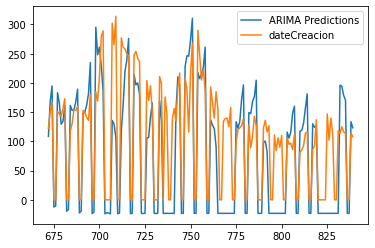

In [36]:
start = len(train)
end = len(train)+len(test)-1

pred = model.predict(start=start,end=end, exog=test[['t5','t4','t3','t2','t1','t']], typ='levels').rename('SARIMAX Predictions')
pred.plot(legend=True)
test['dateCreacion'].plot(legend=True)

In [37]:
error = test
error['predicciones'] = pred
error.head()

,Date,t5,t4,t3,t2,t1,t,dateCreacion,predicciones
672,2020-11-04,1806.0,239.0,614.0,2321.0,2312.0,802.0,122.0,108.443167
673,2020-11-05,239.0,614.0,2321.0,2312.0,802.0,5505.0,151.0,168.671976
674,2020-11-06,614.0,2321.0,2312.0,802.0,5505.0,2217.0,166.0,194.790838
675,2020-11-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-12.376602
676,2020-11-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-10.438983


In [48]:
error['diff'] = error.dateCreacion - error.predicciones
error.head()

,Date,t5,t4,t3,t2,t1,t,dateCreacion,predicciones,diff
672,2020-11-04,1806.0,239.0,614.0,2321.0,2312.0,802.0,122.0,108.443167,13.556833
673,2020-11-05,239.0,614.0,2321.0,2312.0,802.0,5505.0,151.0,168.671976,-17.671976
674,2020-11-06,614.0,2321.0,2312.0,802.0,5505.0,2217.0,166.0,194.790838,-28.790838
675,2020-11-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-12.376602,12.376602
676,2020-11-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-10.438983,10.438983


In [49]:
error['diff'].describe()

count    168.000000
mean      25.433254
std       66.571727
min     -129.692410
25%      -19.273535
50%       23.140225
75%       36.114876
max      207.329564
Name: diff, dtype: float64

<AxesSubplot:>

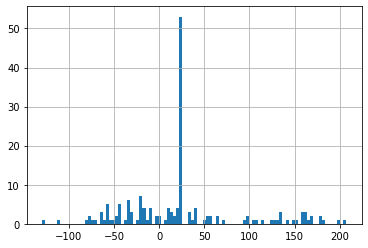

In [50]:
error['diff'].hist(bins=100)

In [44]:
#pred.plot(legend='ARIMA Predictions')
#test['dateCreacion'].plot(legend=True)

In [45]:
test['dateCreacion'].mean()

105.70833333333333

In [46]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['dateCreacion']))
print(rmse)


71.07928990592062


In [47]:
model2=SARIMAX(df['dateCreacion'],order=(5,1,5))
model2=model2.fit()

# For Future Dates

In [ ]:
pred=model2.predict(start=len(df),end=len(df)+50,typ='levels').rename('SARIMAX Predictions')
#print(comp_pred)
#pred.index=index_future_dates
print(pred)

In [ ]:
df['dateCreacion'].plot()
pred.plot(figsize=(12,5),legend=True)